In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
# import dataset 
from sklearn.datasets import load_boston #boston data class 
boston = load_boston()

In [39]:
# data detail 
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

| 特徴量| 説明|
|------- | -------- |
| CRIM | 人口あたりの犯罪発生率（％） |
| ZN | 25000平方フィート以上の住居区域の閉める割りたい（％） |  
| INDUS | 小売業以外の商業施設が閉める面積の割合（％） | 
| CHAS | チャールズ側に関するダミー変数（１：川の周辺、０：それ以外） | 
| NOX | 空気汚染の指標としてのNOxの濃度（単位：pphm） | 
| RM | 住居の平均部屋数（単位：部屋） |
| AGE | 1940年より前に建てられた物件の割合（単位：％） |
| DIS | ５つのボストン市の雇用施設からの重みつけされた距離 |
| RAD | 感情高速道路へのアクセスしやすさ |
| TAX | $10,000ドルあたりの不動産税率の総計 | 
| PTRATIO | 街毎の児童と教師の比率（単位：％） |
| B | 街毎の黒人（Bk）の比率（ 1000(Bk - 0.63)^2 ） |
| LSTAT | 給与の低い、下位1/3の職業に従事する人口の割合（単位：％） |
| MEDV | 住宅価格の中央値（単位：千ドル） |

In [40]:
#特徴量を調べる
#boston.feature_namesにリストとしてはいっている
columns = boston.feature_names
columns
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [41]:
#説明変数確認
# .data
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [42]:
#目的変数の確認
# .target
boston.target[:50]  # スライシングを使って [0...50]を表示

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4])

In [43]:
# panndas dataFrameにcast 
# (変数のarray , 変数名を並べる)
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
# 目的変数もDataFrameに変換
# 各区画について中央値が存在しているので、それを 'MEDV'と命名する
df_target = pd.DataFrame(boston.target , columns=['MEDV'])
df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [45]:
# concat [concatenate：結合する]
#説明変数と目的変数のDataFrameを結合する
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
#seaborn : %matplotlibのwrapper
# locメソッドで必要となる特徴量を抽出
df_pickup = df.loc[:, ['LSTAT', 'INDUS','DIS','RM','MEDV']]

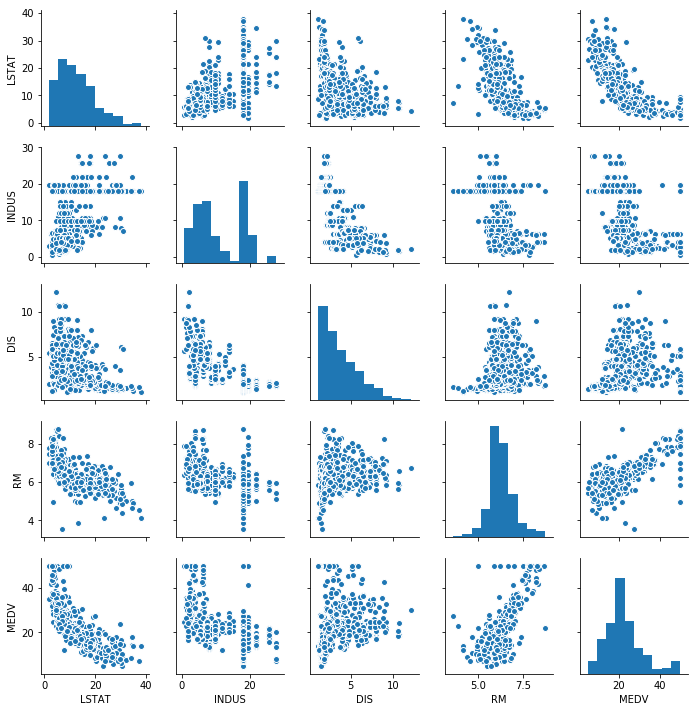

In [47]:
#散布図行列を出力
#  locメソッドで一部の特徴量だけをピックアップ
import seaborn as sns 
sns.pairplot(df_pickup, size=2.0)
plt.show()

In [49]:
#相関係数行列
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


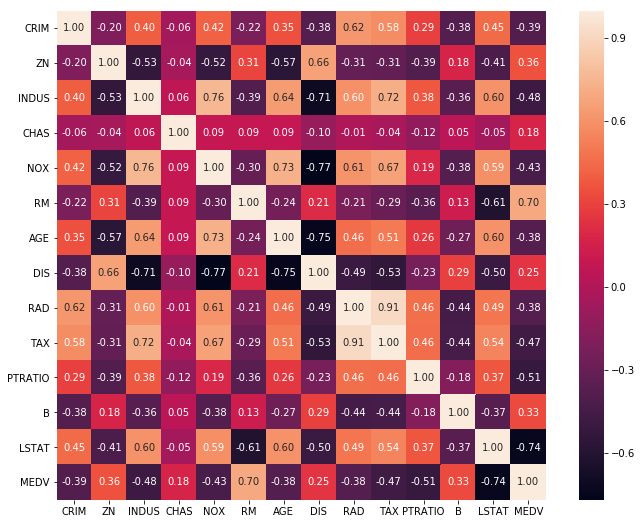

In [114]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()


In [115]:
# 基本統計量
#相関係数より、LSTATとRMは直線的な関係が強い
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## ホールドアウト法
    - train data と test dataの二つに分割して学習する方法。
    　- 訓練用データ「学習に利用するデータ」
    - 検証用データ「学習に利用せずに汎化性能を確認するためだけに利用する」

In [116]:
#train daata
#DataFrameの .valuesメソッドでarrayに変換する
X = df.loc[:,['LSTAT','RM']].values
X


array([[ 4.98 ,  6.575],
       [ 9.14 ,  6.421],
       [ 4.03 ,  7.185],
       ..., 
       [ 5.64 ,  6.976],
       [ 6.48 ,  6.794],
       [ 7.88 ,  6.03 ]])

In [117]:
#test data
# DataFrame .valuesメソッドでarrayに
y = df.loc[:,['MEDV']].values
y[:10]

array([[ 24. ],
       [ 21.6],
       [ 34.7],
       [ 33.4],
       [ 36.2],
       [ 28.7],
       [ 22.9],
       [ 27.1],
       [ 16.5],
       [ 18.9]])

In [118]:
#ホールドアウト法によるデータ分割。
#(X,y、テストにどの割合を昨夏。分割の仕方を決める乱数生成器)
#テストデータの割合は、test_size引数に指定することで変更可能
#今回は検証：テスト（7 : 3 ）
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 0)

In [119]:
print(X.shape)
print(y.shape)

(506, 2)
(506, 1)


In [120]:
print(X_train.shape)
print(y_train.shape)

(354, 2)
(354, 1)


In [121]:
print(X_test.shape)
print(y_test.shape)

(152, 2)
(152, 1)


In [122]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 重回帰線形モデルの学習
#trainデータのみを用いている
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
#定数項出力
lr.intercept_

array([-2.53724672])

In [124]:
#偏回帰係数を出力
#[LSTATの係数, RMの係数]
lr.coef_

array([[-0.6418309 ,  5.27350522]])

y = -2.54 - 0.642x1 + 5.26x2　 　
線形モデル =　 定数項 ＋ 係数　＋ 係数

In [125]:
# 新しい物件について。LSTATとRMを入力
#([[LSTAT,RM]])
X_new = np.array([[12,3]])

#販売価格を入力
y_prop = 15

# 適正価格を予測
y_pred = lr.predict(X_new)

# 割高度計算
price_ratio = y_prop / y_pred

#出力
print(f'y_prop  :{y_prop:.2f}')
print(f"y_pred  :{y_pred[0][0]:.2f}")
print(f'price_ratio : {price_ratio[0][0]:.2f}')


y_prop  :15.00
y_pred  :5.58
price_ratio : 2.69


In [126]:
#決定係数 R^2：10回忌モデルの当てはまりの良さを示す指標
#0~1の間になっていて、１に近いほど、当てはまりがよく、０に近いほど、当てはまりが悪い
#当てはまりが全く無いとマイナスになる可能性もある

#決定係数をtrainとtestに分けて出力
print('R^2')
print(f'train : {lr.score(X_train, y_train):.3f}')
print(f'test  : {lr.score(X_test, y_test):.3f}')

R^2
train : 0.651
test  : 0.607


In [131]:
#自由度調整済み決定係数。（決定係数の改良版）
#予測の役に立たない変数を追加していくと意味もなく数値が大きくなってしまう。。。

#自由度調整済み決定係数。
def adjusted (score , n_sample, n_features):
    adjusted_score = 1- (1 - score) * ((n_sample -1 )/ (n_sample - n_features -1))
    return adjusted_score


In [137]:
#自由度調整済み決定係数
print( 'adjusted R^2')
print(f'train : {adjusted(lr.score(X_train, y_train), len(y_train), 2):.3f}')
print(f'test  : {adjusted(lr.score(X_test, y_test), len(y_test),2):.3f}')

# print('adjusted R^2')
# print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
# print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train : 0.649
test  : 0.602


In [142]:
#root mean squeare error 平均二乗誤差の平方根
# RMSEは正解に対する予測の標準的なずれ、を表す

#二乗誤差 (MSE)の平方根を利用することで、二乗をキャンセルしている
from sklearn.metrics import mean_squared_error as mse

# RMSE をtrain とtestに分けて出力
print('RMSE')
print(f'train : {mse(y_train,lr.predict(X_train))**1/2:.3f}')
print(f'test  : {mse(y_test , lr.predict(X_test))**1/2:.3f}')
#｢現在のモデルでは､通常､予測は正解から16.363千ドルずれる｣ということがわかります｡
# describe()によると､MEDVは平均が22.53､標準偏差が9.197でした｡
# なので､現状のRMSEはそれに対してかなり大きいといえます

RMSE
train : 14.794
test  : 16.363


In [145]:
# 基本統計量
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [153]:
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    #train , test ごとに残差算出
    res_train = y_train_pred - y_train
    res_test = y_test_pred - y_test
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()


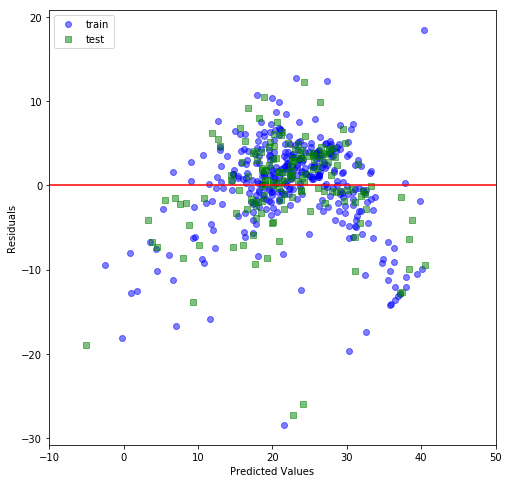

In [154]:
    
# 残差プロットを出力
res_plot(y_train, lr.predict(X_train), y_test, lr.predict(X_test))


In [155]:
#残差プロットは､
#多数の変数を用いた重回帰モデルの性質を
#2次元の平面に落とし込んで観察することが出来ます



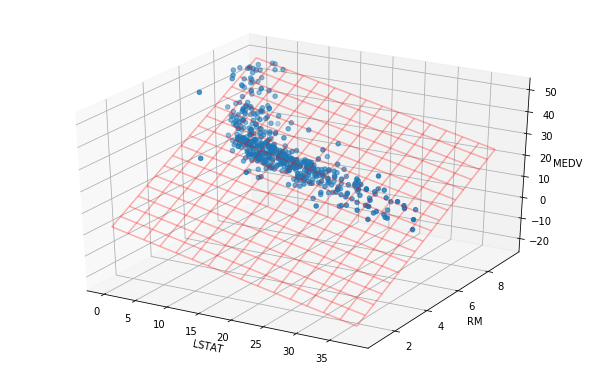

In [156]:
# 3次元のプロットをするためのライブラリを読み込み
from mpl_toolkits.mplot3d import Axes3D

# Axes3Dのインスタンスを生成
ax = Axes3D(plt.figure(figsize=(8, 5)))

# 3次元の散布図を出力
# (x軸, y軸 , z軸)
ax.scatter3D(df['LSTAT'], df['RM'], df['MEDV'])

# # 回帰平面の方程式を定義
X_grid, Y_grid = np.meshgrid(np.arange(0, 40, 2.5), np.arange(1, 10, 0.5))
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 回帰平面を表示
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# 座標軸のラベルを指定
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

# ここまでの内容でグラフをプロット
plt.show()

In [158]:
# 標準化とは､変数を標準正規分布のスケーリングに合わせる処理のことです｡
# 一般に､データの分布は何かしらの平均値近くに集まっていて､
# そこから離れていくにつれて数が減っていくような釣鐘型の正規分布をなすとされています｡このときに､中心位置を表す平均を0に､ばらつきを表す標準偏差を1に統一させることによって､変数のスケールに合わせます｡
# こうすれば､偏回帰係数が説明変数のの重要度だけを表す標準化偏回帰係数になります｡
# また､その変換は以下の式で実行されます｡

In [159]:
# 変数の標準化は､sklearn.preprocessingに収録されている
# StandardScalerクラスを用いて行うことができます｡fit_transform()関数で実行されます｡
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(boston.data)
y_std = ss.fit_transform(y)

In [161]:
X_std[:5]

array([[-0.41771335,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41468015, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41040922, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

In [163]:
y_std[:10]

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288],
       [ 0.6712218 ],
       [ 0.03996443],
       [ 0.49708184],
       [-0.65659542],
       [-0.39538548]])

In [168]:
#標準化した説明変数の平均
print(f'x_std : {X_std.mean()}')
print(f'y_std: {y_std.mean()}')

x_std : -1.1233877245218975e-15
y_std: -5.195668225913776e-16


In [169]:
#標準化した説明変数の標準偏差
print(f'X_std.std : {X_std.std()}')
print(f'y_std.std : {y_std.std()}')

X_std.std : 0.9999999999999994
y_std.std : 0.9999999999999999


In [170]:
lr_std = LinearRegression() #標準化したデータで線形モデルの学習
lr_std.fit(X_std, y_std)
#標準回帰係数の出力


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
lr_std.coef_

array([[-0.10017523,  0.1176512 ,  0.01556018,  0.0742493 , -0.22421527,
         0.29066587,  0.00229872, -0.3378803 ,  0.28937562, -0.22593552,
        -0.22443985,  0.09323458, -0.40799686]])

## 抑制変数とは､
    - 目的変数との相関が小さくても予測における
    - 重要度が大きい説明変数のことです
    - "自由度調整済み決定係数がより大きいモデルを採用するようにしましょう｡"

## 多重共線性
    - 相関が強い説明変数同士を一緒に利用したため、回帰式が信頼できなくってしまうこと
## 交互作用
    - とある説明変数の効果が別の説明変数の値によって変化する作用のこと
    


 
テスト結果

Q1: 講座の内容に一致するものをすべて選べ

1. 重回帰分析とは、複数の説明変数を利用した回帰分析のことである 
2. 重回帰においては、回帰係数は偏回帰係数と呼ばれる 
3. 4次元以上の空間は可視化出来ないので、説明変数は3つまでしか増やせない 
4. 高次元空間における直線や平面のようなものを超平面と呼ぶ 

結果	あなたの答え	正解

[1,2,4]	[1,2,4]
Q2: 他者が集めたデータについて確認すべき情報をすべて選べ

1. 出典 
2. 目的変数 
3. 説明変数 
4. サンプル数 
5. 欠損値の個数 

結果	あなたの答え	正解

[1,2,3,4,5]	[1,2,3,4,5]
Q3: 「複数のDataFrameを横方向に結合する」という目的を達成するためのコードとして、正しいものを1つ選べ

1. pd.DataFrame(array, [feature_name_1, feature_name_2, feature_name_3]) 
2. pd.DataFrame(array, feature_name_1, feature_name_2, feature_name_3) 
3. pd.concat(df_1, df_2, axsi=0) 
4. pd.concat([df_1, df_2], axis=1) 

結果	あなたの答え	正解

[4]	[4]
Q4: データの可視化について、講座の内容と一致するものをすべて選べ

1. 散布図行列とは、複数の変数の組み合わせについて散布図とヒストグラムを出力した図である 
2. ヒストグラムを観察するときは、形状が正規分布からずれた理由を考えると良い 
3. 重回帰分析のときは、単回帰と違って曲線的な傾向の強い説明変数を採用する 
4. ヒートマップは相関係数行列を見やすくするために利用できる 

結果	あなたの答え	正解

[1,2]	[1,2,4]
Q5: 過学習について、講座の内容と一致するものをすべて選べ

1. 過学習とは、モデルが学習データには詳しくなったけど、将来のデータに対してはそれほどでもないというような状態のことを指している 
2. trainデータに対する精度が高ければ、そのモデルは汎化性能が高いといえる 
3. trainデータの特徴を細かく拾えば拾うほど、汎化性能が高いモデルになる 
4. 教師あり学習では、学習データのすべてを学習に利用することが推奨される 

結果	あなたの答え	正解

[1]	[1]
Q6: 決定係数・自由度調整済み決定係数・RMSEについて、講座の内容と一致するものをすべて選べ

1. 決定係数・自由度調整済み決定係数とは、重回帰モデルの当てはまりの良さを表す指標である 
2. 決定係数と自由度調整済み決定係数は、目的によって柔軟に使い分けるべきである 
3. RMSEを利用すると、予測が通常どれだけずれるかということがより直感的にわかる 
4. 二乗誤差関数のルートをとることは、単位を本来のものに戻す意味合いがある 

結果	あなたの答え	正解

[1,3]	[1,3,4]
Q7: 残差プロットについて、講座の内容と一致するものをすべて選べ

1. 残差プロットは、予測の外れ方の傾向を視覚的に掴む手法である 
2. 残差とは、予測値と正解値の差のことである 
3. 外れ値も貴重なサンプルのひとつなので、必ず学習に利用しなければならない 
4. 残差プロットの大きな利点として、傾向を2次元の平面に落とし込んで観察できるというものがある 

結果	あなたの答え	正解

[1,4]	[1,2,4]
Q8: 標準化重回帰分析について、講座の内容と一致するものをすべて選べ

1. 通常、各変数の数値1あたりの意味・重みには差がある 
2. 標準化では、各変数の平均と標準偏差を1に統一させる 
3. 標準化重回帰のモデルは、通常の重回帰のモデルよりも汎化性能が高く出るために利用される 
4. 標準化重回帰では、目的変数も説明変数と同様のスケーリングを行う必要がある 

結果	あなたの答え	正解

[1,4]	[1,4]
Q9: 重回帰分析における注意点について、講座の内容と一致するものをすべて選べ

1. 線形回帰の場合でも、相関係数の大きさを比べさえすれば説明変数の重要度がわかる 
2. 互いに相関関係の強い説明変数を利用した方が、モデルの性能は安定する 
3. 交互作用とは、説明変数同士の相関関係の強さを表している 
4. 線形モデルを利用している限りは、予測に交互作用を反映させることはできない 

結果	あなたの答え	正解

[4]	[4]
